In [1]:
import neattext.functions as nfx

In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [4]:
df = pd.read_csv("emotion_dataset_2.csv")

In [5]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [6]:
df.Emotion.value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

/Users/devansh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Emotion', ylabel='count'>

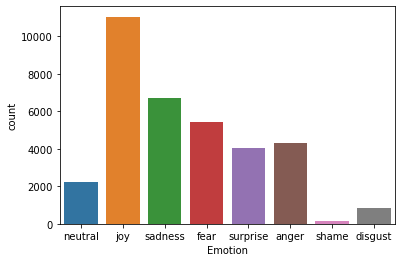

In [7]:
sns.countplot(df["Emotion"])

In [8]:
df.isnull().sum()

Unnamed: 0      0
Emotion         0
Text            0
Clean_Text    466
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.shape

(34326, 4)

In [11]:
from sklearn.pipeline import Pipeline

In [16]:
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=98)


In [17]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])


In [18]:
pipe_lr.fit(x_train,y_train)


/Users/devansh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [19]:
pipe_lr.score(x_test,y_test)


0.6225480675859391

In [20]:
eg = "i hate you"

In [22]:
pipe_lr.predict([eg])

array(['anger'], dtype=object)

In [23]:
eg2 = "i am in love"

In [24]:
pipe_lr.predict([eg2])

array(['joy'], dtype=object)

In [27]:
eg3 = "i am in embarrassment"

In [28]:
pipe_lr.predict([eg3])

array(['shame'], dtype=object)

In [29]:
eg3 = "wow this is so amazing i wasnt expecting"

In [30]:
pipe_lr.predict([eg3])

array(['surprise'], dtype=object)

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

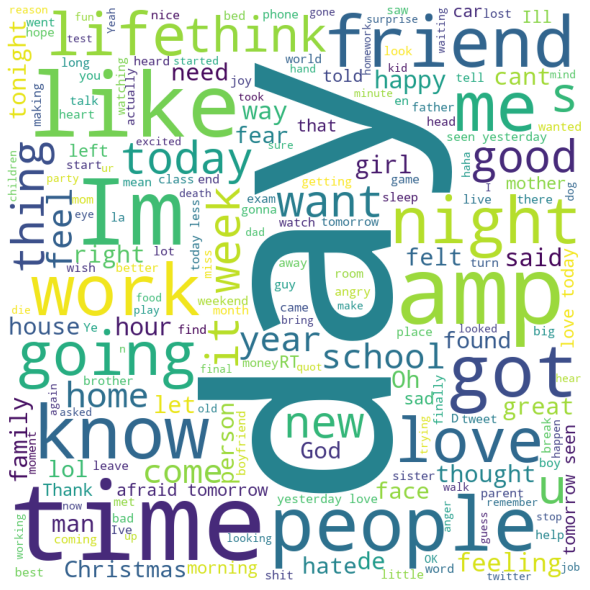

In [33]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = set(), min_font_size = 10).generate(' '.join(df['Clean_Text']))

# Generate the wordcloud and display it
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Show the plot
plt.show()

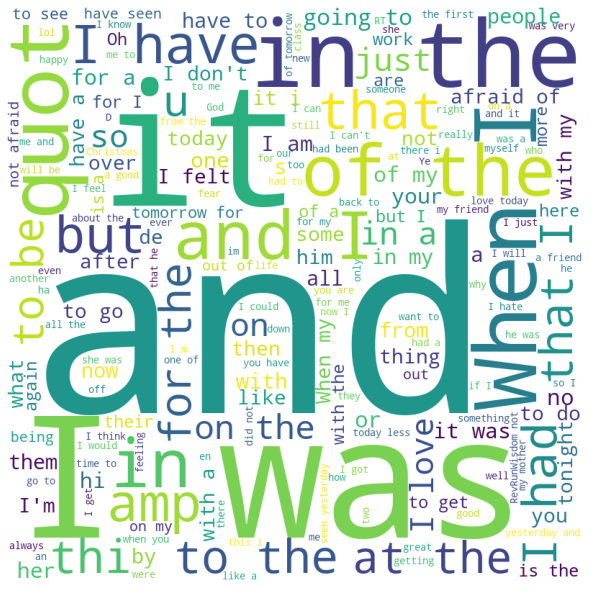

In [34]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = set(), min_font_size = 10).generate(' '.join(df['Text']))

# Generate the wordcloud and display it
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Show the plot
plt.show()